<a href="https://colab.research.google.com/github/Neersha/Machine-learning/blob/main/EM_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_excel("EM test.xlsx")
df.head()

,Age
0,1340
1,1519
2,1640
3,1477
4,1329


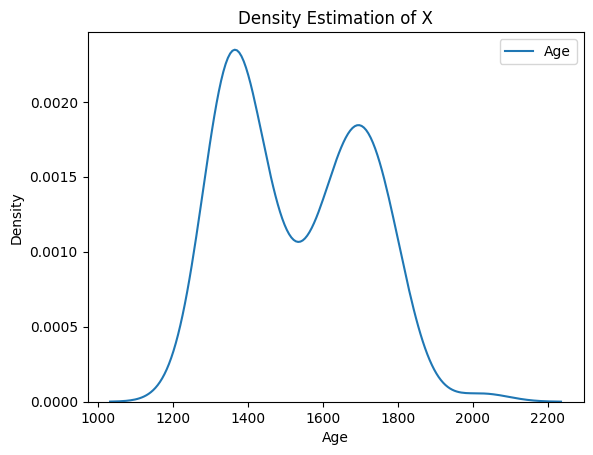

In [3]:
sns.kdeplot(df)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Density Estimation of X')
plt.show()

In [5]:
import pandas as pd

def count_models(file_path):
  """Counts the number of unique age values in a CSV file.

  Args:
    file_path: Path to the CSV file.

  Returns:
    The number of unique age values.
  """

  df = pd.read_csv(file_path)
  unique_ages = df['age'].unique()
  num_models = len(unique_ages)
  return num_models

# Example usage:
file_path = 'your_data.csv'
num_models = count_models(file_path)
print("Number of models:", num_models)

FileNotFoundError: [Errno 2] No such file or directory: 'your_data.csv'

In [7]:
import pandas as pd

def count_models(file_path):
  """Counts the number of unique age values in a CSV file.

  Args:
    file_path: Path to the CSV file.

  Returns:
    The number of unique age values.
  """

  df = pd.read_csv('EM test1.csv')
  unique_ages = df['Age'].unique()
  num_models = len(unique_ages)
  return num_models

# Example usage:
file_path = 'your_data.csv'
num_models = count_models(file_path)
print("Number of models:", num_models)

Number of models: 98


In [8]:
def define_model(Age):
  for low, high in age_ranges:
    if low <= age <= high:
      return f"Age Range: {low}-{high}"
  return "Other"

# Create a new 'model' column based on age ranges
df['model'] = df['Age'].apply(define_model)

# Count the number of models (unique values in 'model' column)
num_models = df['model'].nunique()

# Print results
print("Number of models:", num_models)
print(df.groupby('model').size())

NameError: name 'age_ranges' is not defined

In [ ]:
mu1_hat, sigma1_hat = np.mean(df), np.std(df)


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [ ]:
pi1_hat= len(df)

In [ ]:
num_epochs = 20
log_likelihoods = []

for epoch in range(num_epochs):
    # E-step: Compute responsibilities
    gamma1 = pi1_hat * norm.pdf(df, mu1_hat, sigma1_hat)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


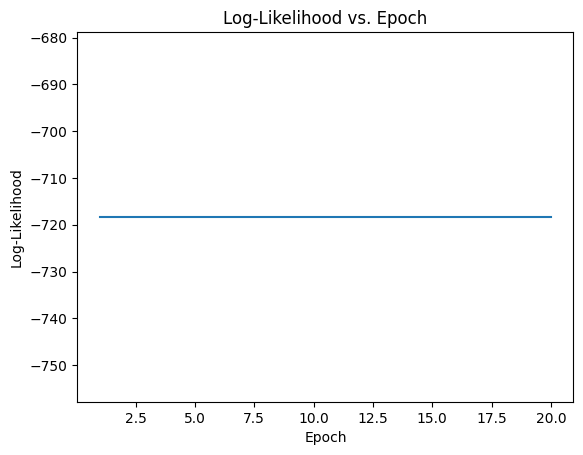

In [ ]:
# Perform EM algorithm for 20 epochs
num_epochs = 20
log_likelihoods = []

for epoch in range(num_epochs):
	# E-step: Compute responsibilities
	gamma1 = pi1_hat * norm.pdf(df, mu1_hat, sigma1_hat)

	total = gamma1
	gamma1 /= total


	# M-step: Update parameters
	mu1_hat = np.sum(gamma1 * df) / np.sum(gamma1)
	sigma1_hat = np.sqrt(np.sum(gamma1 * (df - mu1_hat)**2) / np.sum(gamma1))

	pi1_hat = np.mean(gamma1)

	# Compute log-likelihood
	log_likelihood = np.sum(np.log(pi1_hat * norm.pdf(df, mu1_hat, sigma1_hat)))
	log_likelihoods.append(log_likelihood)

# Plot log-likelihood values over epochs
plt.plot(range(1, num_epochs+1), log_likelihoods)
plt.xlabel('Epoch')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood vs. Epoch')
plt.show()


In [ ]:
from scipy import stats
import scipy.stats.kde as kde
from scipy.stats import gaussian_kde

In [ ]:
# Plot the final estimated density
df_sorted = np.sort(df)
density_estimation = pi1_hat*norm.pdf(df_sorted,mu1_hat,sigma1_hat)


plt.plot(df_sorted, gaussian_kde(df_sorted)(df_sorted), color='green', linewidth=2)
plt.plot(df_sorted, density_estimation, color='red', linewidth=2)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Density Estimation of Age')
plt.legend(['Kernel Density Estimation','Mixture Density'])
plt.show()


ValueError: Number of dimensions is greater than number of samples. This results in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Note that `gaussian_kde` interprets each *column* of `dataset` to be a point; consider transposing the input to `dataset`.

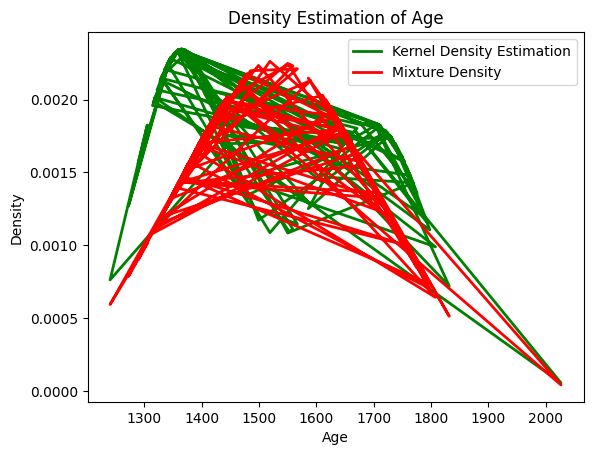

In [ ]:
# Plot the final estimated density
df_sorted = np.sort(df)
density_estimation = pi1_hat*norm.pdf(df_sorted,mu1_hat,sigma1_hat)

# Reshape df_sorted to be a 1D array for gaussian_kde
df_sorted_2d = df_sorted.ravel()

plt.plot(df_sorted, gaussian_kde(df_sorted_2d)(df_sorted_2d), color='green', linewidth=2)
plt.plot(df_sorted, density_estimation, color='red', linewidth=2)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Density Estimation of Age')
plt.legend(['Kernel Density Estimation','Mixture Density'])
plt.show()

(array([ 1.,  0.,  1.,  1.,  4.,  6.,  9., 12.,  3.,  3.,  4.,  1.,  5.,
         1.,  1.,  3.,  1.,  1.,  0.,  2.,  2.,  1.,  1.,  2.,  2.,  6.,
         4.,  3.,  2.,  6.,  2.,  5.,  4.,  3.,  1.,  3.,  1.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1240.  , 1255.74, 1271.48, 1287.22, 1302.96, 1318.7 , 1334.44,
        1350.18, 1365.92, 1381.66, 1397.4 , 1413.14, 1428.88, 1444.62,
        1460.36, 1476.1 , 1491.84, 1507.58, 1523.32, 1539.06, 1554.8 ,
        1570.54, 1586.28, 1602.02, 1617.76, 1633.5 , 1649.24, 1664.98,
        1680.72, 1696.46, 1712.2 , 1727.94, 1743.68, 1759.42, 1775.16,
        1790.9 , 1806.64, 1822.38, 1838.12, 1853.86, 1869.6 , 1885.34,
        1901.08, 1916.82, 1932.56, 1948.3 , 1964.04, 1979.78, 1995.52,
        2011.26, 2027.  ]),
 <BarContainer object of 50 artists>)

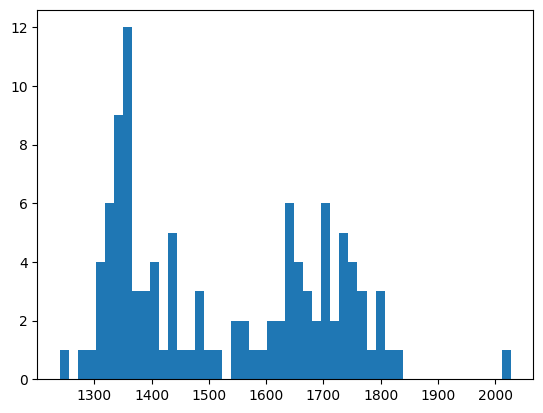

In [ ]:
plt.hist(df, bins=50)

In [10]:
from sklearn.mixture import GaussianMixture

In [11]:
df_reshaped = df.values.reshape((len(df),1))

In [12]:
model=GaussianMixture(n_components=3, init_params='k-means++')
model.fit(df)

GaussianMixture(init_params='k-means++', n_components=3)

In [13]:
y1=model.predict(df)
print(y1)

[0 1 2 1 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 2 2 0 1 1 0 2 0 0 0 0 0 0
 0 0 2 2 2 1 0 1 2 2 2 2 0 0 2 0 0 0 0 0 2 2 1 2 2 2 1 2 0 1 0 1 2 0 0 2 0
 0 2 2 2 2 0 2 0 1 0 0 2 2 0 1 2 2 2 2 2 0 2 2 0 1 1 0 2 2 2 0 2 2 2 2]


In [14]:
gmm=GaussianMixture(n_components=3, random_state=109)
label=gmm.fit_predict(df)

In [16]:
df['GMM lebel']= label

In [17]:
df.head()

,Age,GMM lebel
0,1340,1
1,1519,2
2,1640,0
3,1477,2
4,1329,1


from matplotlib import pyplot as plt
_df_0['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['GMM lebel'].plot(kind='hist', bins=20, title='GMM lebel')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Age', y='GMM lebel', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['GMM lebel'].plot(kind='line', figsize=(8, 4), title='GMM lebel')
plt.gca().spines[['top', 'right']].set_visible(False)

In [18]:
df['GMM lebel'].value_counts()

,count
GMM lebel,
1,52
0,43
2,14


In [35]:
gmm=GaussianMixture(n_components=5, random_state=109)
label=gmm.fit_predict(df)

In [36]:
df['GMM lebel']= label

In [37]:
df['GMM lebel'].value_counts()

,count
GMM lebel,
0,43
1,34
3,18
4,12
2,2


In [38]:
df.head()

,Age,GMM lebel
0,1340,1
1,1519,4
2,1640,0
3,1477,4
4,1329,1


In [39]:
gm = GaussianMixture(n_components=5).fit(df)

gm.get_params()

{'covariance_type': 'full',
 'init_params': 'kmeans',
 'max_iter': 100,
 'means_init': None,
 'n_components': 5,
 'n_init': 1,
 'precisions_init': None,
 'random_state': None,
 'reg_covar': 1e-06,
 'tol': 0.001,
 'verbose': 0,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}

In [40]:
centers = gm.means_
print(centers)

[[1.92950000e+03 2.00000000e+00]
 [1.33979412e+03 1.00000000e+00]
 [1.70639535e+03 0.00000000e+00]
 [1.24000000e+03 3.00000000e+00]
 [1.46765517e+03 3.41379310e+00]]


In [41]:
from pandas import DataFrame

In [29]:
pred = gm.predict(df)

df1 = DataFrame({'x':df[:,0], 'y':df[:,1], 'label':pred})
groups = df1.groupby('label')



InvalidIndexError: (slice(None, None, None), 0)

In [45]:
pred = gm.predict(df)
# Access DataFrame columns using their names or .iloc for integer-based indexing
df1 = DataFrame({'a': df.iloc[:, 0], 'b': df.iloc[:, 1], 'c': df.iloc[:, 2], 'd':df.iloc[:,3], 'e': df.iloc[:, 4], 'label': pred})
groups = df1.groupby('label')

IndexError: single positional indexer is out-of-bounds

AttributeError: 'Axes' object has no attribute 'plt'

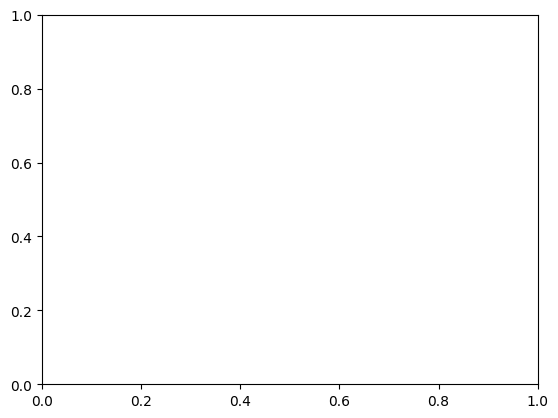

In [31]:
ig, ax = plt.subplots()
for name, group in groups:
    ax.plt(group.x, group.y, label=name)

ax.legend()
plt.show()

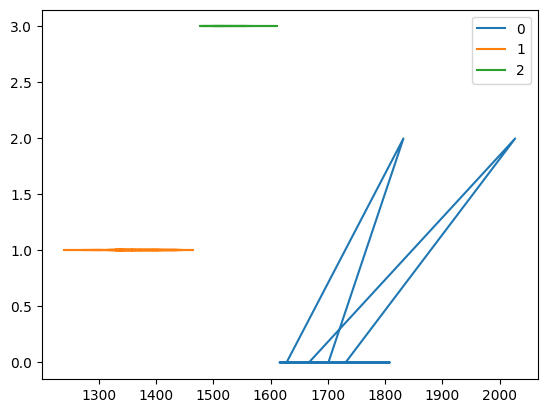

In [42]:
import matplotlib.pyplot as plt  # Make sure pyplot is imported

fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.x, group.y, label=name)  # Use ax.plot() instead of ax.plt()

ax.legend()
plt.show()

NameError: name 'x' is not defined

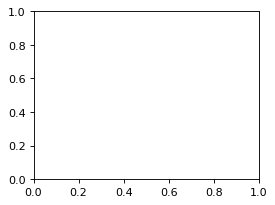

In [33]:
f = plt.figure(figsize=(8, 6), dpi=80)
f.add_subplot(2, 2, 1)

for i in range(2, 6):
 gm = GaussianMixture(n_components=i).fit(x)
 pred = gm.predict(x)
 df = DataFrame({'x':x[:,0], 'y':x[:,1], 'label':pred})
 groups = df.groupby('label')
 f.add_subplot(2, 2, i-1)
 for name, group in groups:
    plt.scatter(group.x, group.y, label=name, s=8)
    plt.title("Cluster size:" + str(i))
    plt.legend()

plt.tight_layout()
plt.show()

InvalidIndexError: (slice(None, None, None), 0)

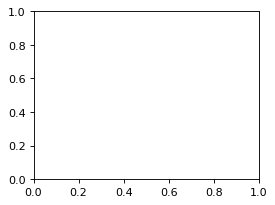

In [34]:
f = plt.figure(figsize=(8, 6), dpi=80)
f.add_subplot(2, 2, 1)

# Assuming 'df' contains the data you want to fit the Gaussian Mixture to
x = df.iloc[:, :2].values  # Extract the first two columns as a NumPy array

for i in range(2, 6):
    gm = GaussianMixture(n_components=i).fit(df)
    pred = gm.predict(df)
    df_clustered = DataFrame({'x': df[:, 0], 'y': df[:, 1], 'label': pred})  # Use a different name for clarity
    groups = df1_clustered.groupby('label')  # Group the new DataFrame
    f.add_subplot(2, 2, i - 1)
    for name, group in groups:
        plt.plt(group.x, group.y, label=name, s=8)
        plt.title("Cluster size:" + str(i))
        plt.legend()

plt.tight_layout()
plt.show()